# Univariate Analysis - Numerical and Categorical Variables

This will demonstrate how to perform univariate analysis on numerical and categorical variables.

## Import libraries and load data

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

print(pd.__version__)
print(np.__version__)

2.1.1
1.26.1


In [2]:
# Loading data
data = pd.read_csv('datasets/churn_prediction.csv')

# Printing the data
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [3]:
# Shape and columns of the data
print('Shape:', data.shape)
print('Columns:', data.columns)

Shape: (28382, 21)
Columns: Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn',
       'last_transaction'],
      dtype='object')


## Variable Identification and Typecasting

In [4]:
# A closer look at the data types present in the data
print(data.dtypes)

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
last_transaction                   object
dtype: object


### Int and Float types

In [5]:
# Identifying variables with integer datatype
print(data.dtypes[data.dtypes == 'int64'])
print('--------------')

print(data.dtypes[data.dtypes == 'float64'])

customer_id             int64
vintage                 int64
age                     int64
customer_nw_category    int64
branch_code             int64
churn                   int64
dtype: object
--------------
dependents                        float64
city                              float64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object


**Inferences Drawn:**
- **Customer id** are a unique number assigned to customers. It can be stored **as Integer**.
- **branch code** again represents different branches, therefore it should be **converted to category**.
- **Age** and **Vintage** are also numbers and hence we are okay with them as integers.
- **customer_nw_category** is supposed to be an ordinal category, **should be converted to category**.
- **churn**
    - 1 represents the churn and 0 represents not churn.
    - This **needs to be converted to category datatype**.
- **dependents** is expected to be a whole number. **Should be changed to integer type**
- **city** variable is also a unique code of a city represented by some interger number. It must be converted to **category type**.
- Rest of the variables like **credit, balance and debit** are best represented by the float variables.

In [6]:
# Converting int variables to category variables
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# Identifying variables with integer datatype
print(data.dtypes[data.dtypes == 'int64'])
print('--------------')

print(data.dtypes[data.dtypes == 'float64'])
print('--------------')

data[['dependents','city']].dtypes

customer_id    int64
vintage        int64
age            int64
dtype: object
--------------
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
dtype: object
--------------


dependents       Int64
city          category
dtype: object

### Object / Category type

In [7]:
# Print the variables of the type 'object'
print(data.dtypes[data.dtypes == 'object'])

gender              object
occupation          object
last_transaction    object
dtype: object


In [8]:
# Manually checking object types
data[['gender','occupation','last_transaction']].head(7)

,gender,occupation,last_transaction
0,Male,self_employed,2019-05-21
1,Male,self_employed,2019-11-01
2,Male,salaried,NaT
3,NaN,self_employed,2019-08-06
4,Male,self_employed,2019-11-03
5,Female,self_employed,2019-11-01
6,Male,retired,2019-09-24


**gender** and **occupation** variables belong to **categorical data types**. **last_transaction** should be a  **datetime variable**.

In [9]:
# typecasting "gender" and "occupation" to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

# checking
data[['gender','occupation']].dtypes

gender        category
occupation    category
dtype: object

### Datetime type

In [10]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

# extracting new columns from "last_transaction"
# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

In [11]:
# checking new extracted columns using datetime
data[['last_transaction', 'doy_ls_tran', 'moy_ls_tran', 'dow_ls_tran']].head()

,last_transaction,doy_ls_tran,moy_ls_tran,dow_ls_tran
0,2019-05-21,141.0,5.0,1.0
1,2019-11-01,305.0,11.0,4.0
2,NaT,NaN,NaN,NaN
3,2019-08-06,218.0,8.0,1.0
4,2019-11-03,307.0,11.0,6.0


The first column is the complete date of the last transaction which was done by the any given customer. The next columns represent the day of year, week of year, month of year, day of week when the last transaction was done. **Breaking down the date variable** into these granular information will help us in understanding when the last transaction was done from different perspectives.

In [12]:
# Drop the last_transaction column
data = data.drop(columns = ['last_transaction'])
print(data.dtypes)

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran                        float64
dtype: obje

## Univariate Analysis: Numerical Variables

Perform univariate analysis only on numerical variables.

In [13]:
# Numerical datatypes
print(data.select_dtypes(include=['int64','float64','Int64']).dtypes)

customer_id                         int64
vintage                             int64
age                                 int64
dependents                          Int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
doy_ls_tran                       float64
moy_ls_tran                       float64
dow_ls_tran                       float64
dtype: object


In [14]:
# Segregating variables into groups
customer_details = ['customer_id', 'age', 'vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','moy_ls_tran', 'dow_ls_tran']

In [15]:
# custom function for easy and efficient analysis of numerical univariate
def univariate_analysis_numerical(data, var_group):
  ''' 
  univariate_analysis_numerical takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''
  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max() - data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean - st_dev, mean + st_dev

    # Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(x = points, y = [0,0], color = 'black', label = "std_dev")
    sns.scatterplot(x = [mini,maxi], y = [0,0], color = 'orange', label = "min/max")
    sns.scatterplot(x = [mean], y = [0], color = 'red', label = "mean")
    sns.scatterplot(x = [median], y = [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

### customer_details

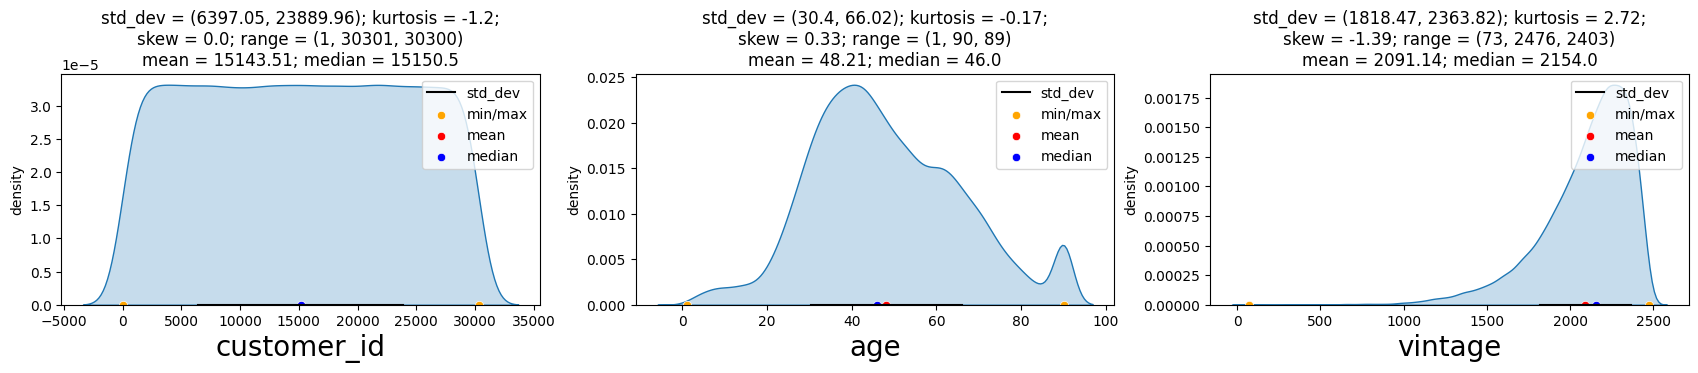

In [16]:
# Performing univariate analysis on customer details
univariate_analysis_numerical(data, customer_details)

**Summary of Customer_Information:**
- **customer_id**:
    - variable is **unique for every customer, Hence uniform** distribution.
    - This variable **does not contribute any information**, hence can be eliminated from data.
<br></br>
- **age**:
    - Median Age = 46 and most of the customers' age are between 30 and 66.
    - Skewness = 0.33: customer age is **negligibly biased towards younger age**.
    - Kurtosis = -0.17: Very less likely to have extreme/outlier values.
<br></br>
- **vintage:**
    - Most customers joined between 2100 and 2650 days from the day of data extraction.
    - Skewness = -1.42: this is left skewed, **vintage variable is significantly biased towards longer association of customers.**
    - Kurtosis = 2.93: Extreme values and Outliers are very likely to be present in vintage.

### current_month

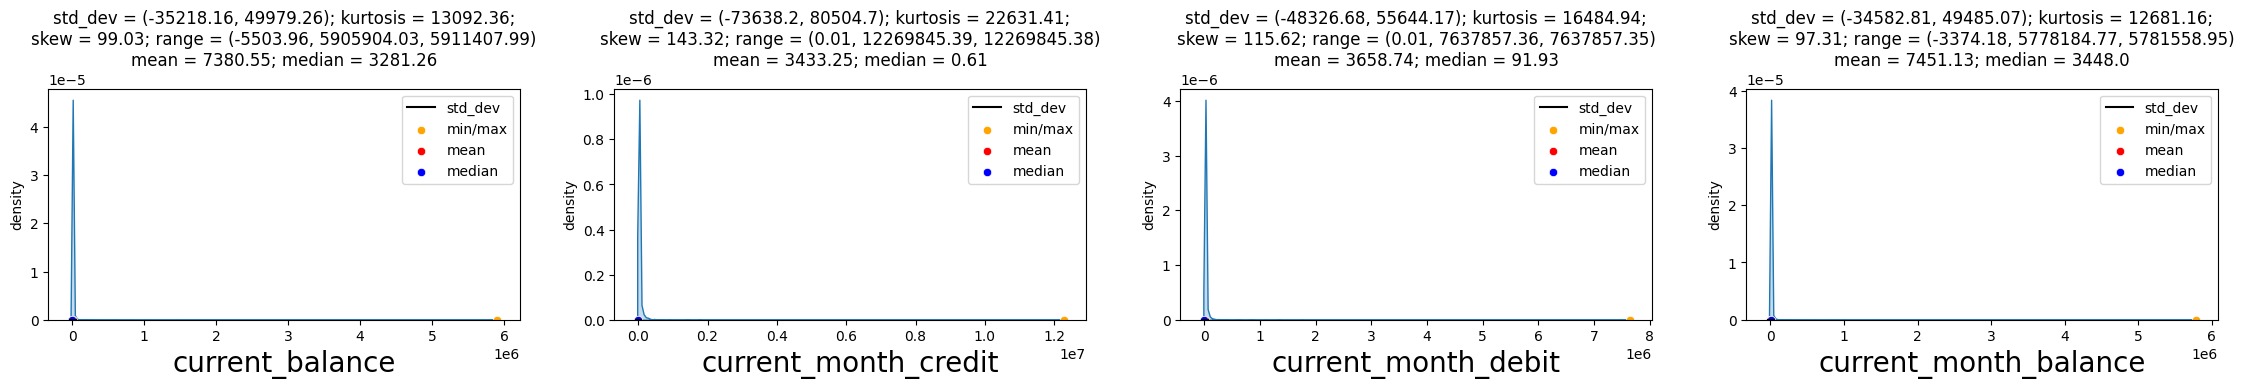

In [17]:
# Performing univariate analysis on current month 
univariate_analysis_numerical(data, current_month)

**Summary:**
- Considering the kurtosis and skewness value  for all 4 of these plots. Outliers/Extreme values are present.
- We need to remove outliers to visulaise these plots.

In [18]:
# standard deviation factor
factor = 3

# copying current_month
cm_data = data[current_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
cm_data = cm_data[cm_data['current_balance'] < factor*cm_data['current_balance'].std()]
cm_data = cm_data[cm_data['current_month_credit'] < factor*cm_data['current_month_credit'].std()]
cm_data = cm_data[cm_data['current_month_debit'] < factor*cm_data['current_month_debit'].std()]
cm_data = cm_data[cm_data['current_month_balance'] < factor*cm_data['current_month_balance'].std()]

# checking how many points removed
len(data), len(cm_data)

(28382, 27113)

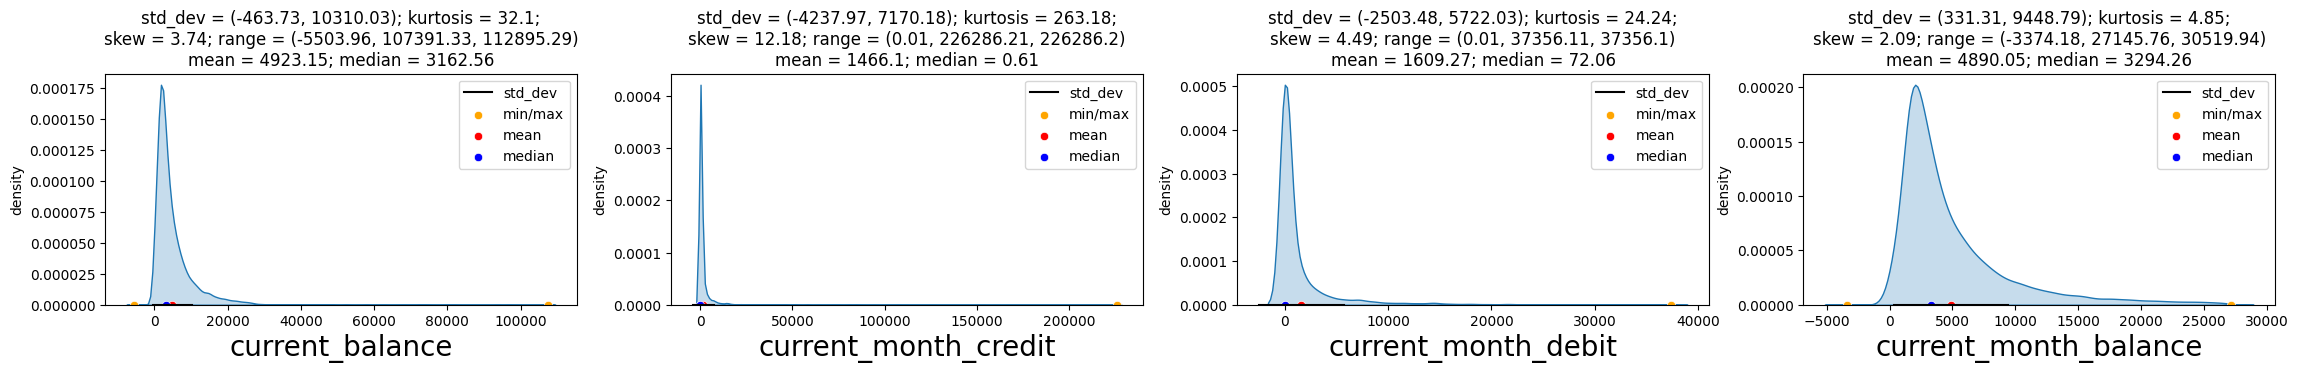

In [19]:
# Performing univariate analysis again on current month 
univariate_analysis_numerical(cm_data, current_month)

**Summary of current_month:**
After removing extreme outliers, plots are still very skewed.

### previous_month

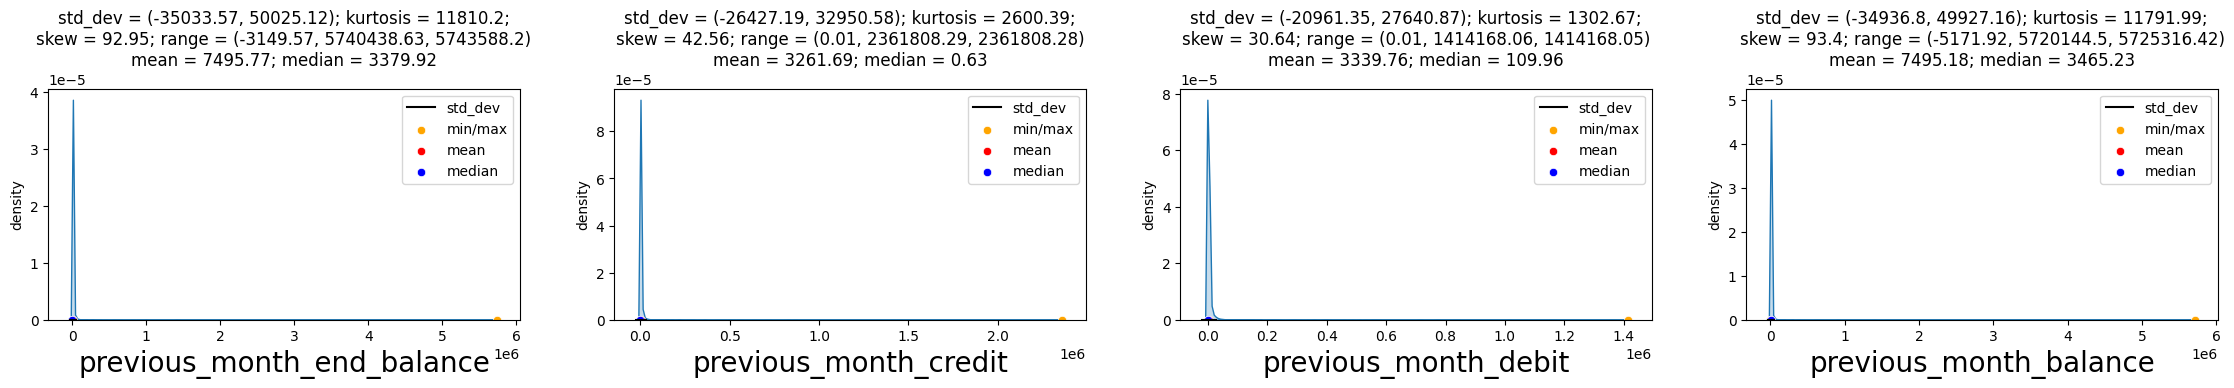

In [20]:
# Performing univariate analysis on previous month 
univariate_analysis_numerical(data, previous_month)

**Summary of previous_month**
*    This looks very similar to current_month. Most of the customers perform low amount transactions.

In [21]:
# standard deviation factor
factor = 3

# copying previous_month
pm_data = data[previous_month]

# filtering using standard deviation (not considering obseravtions > 3* standard deviation)
pm_data = pm_data[pm_data['previous_month_end_balance'] < factor*pm_data['previous_month_end_balance'].std()]
pm_data = pm_data[pm_data['previous_month_credit'] < factor*pm_data['previous_month_credit'].std()]
pm_data = pm_data[pm_data['previous_month_debit'] < factor*pm_data['previous_month_debit'].std()]
pm_data = pm_data[pm_data['previous_month_balance'] < factor*pm_data['previous_month_balance'].std()]

# checking how many points removed
len(data), len(pm_data)

(28382, 27083)

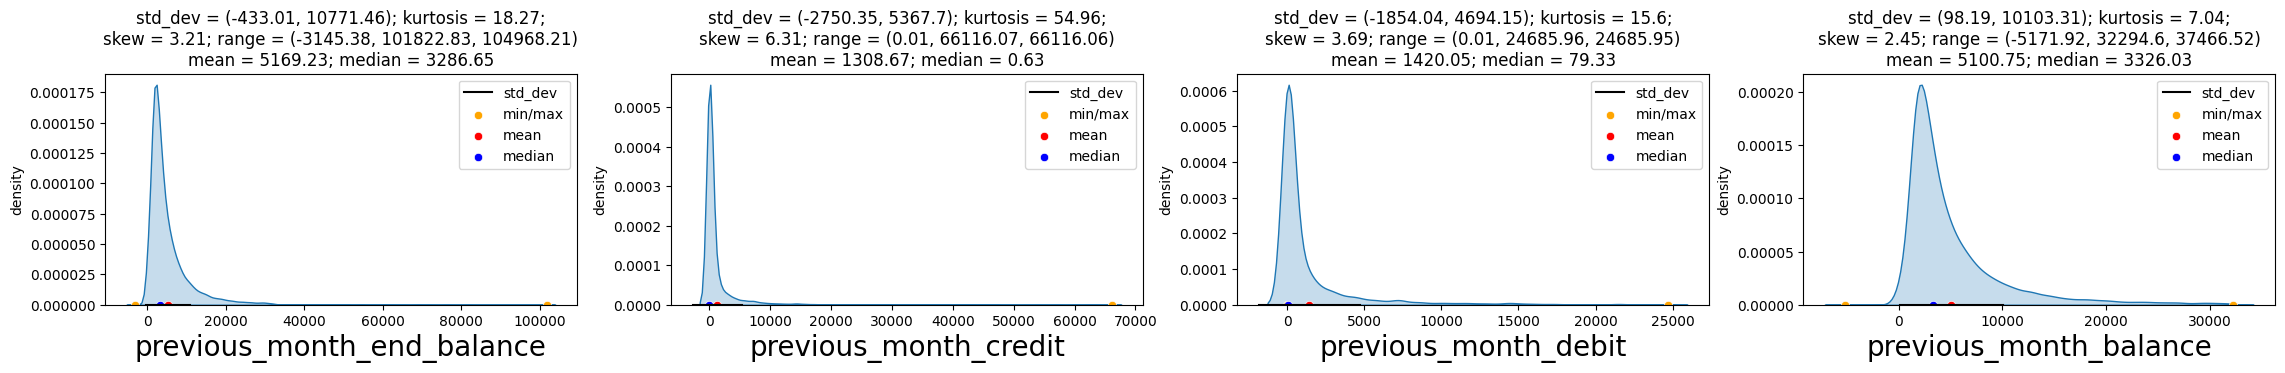

In [22]:
# Performing univariate analysis again on previous month 
univariate_analysis_numerical(pm_data, previous_month)

**Summary of previous_month:** After removing extreme outliers, plots are still very skewed.

### previous_quarters

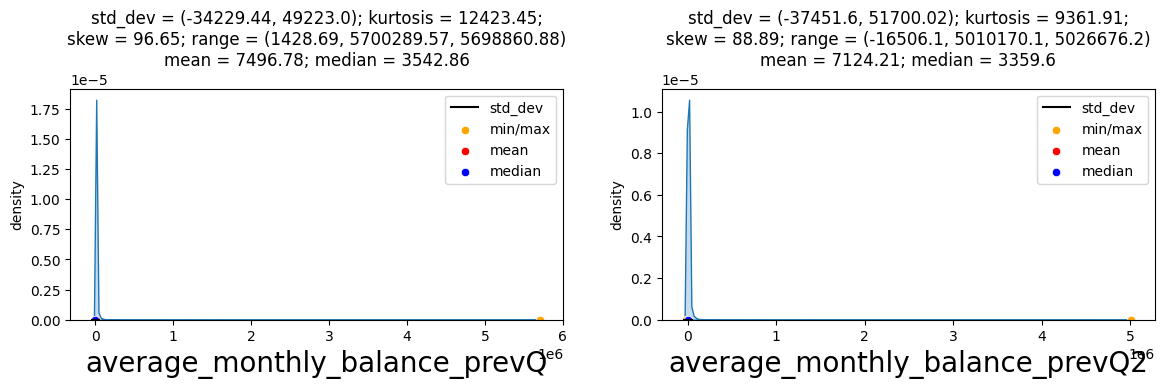

In [23]:
# Performing univariate analysis on previous quarters
univariate_analysis_numerical(data, previous_quarters)

**Summary:** The general trend still follows, it is crucial that we find out if there is any common trait between the customers doing high amount of transactions.

### transaction_date

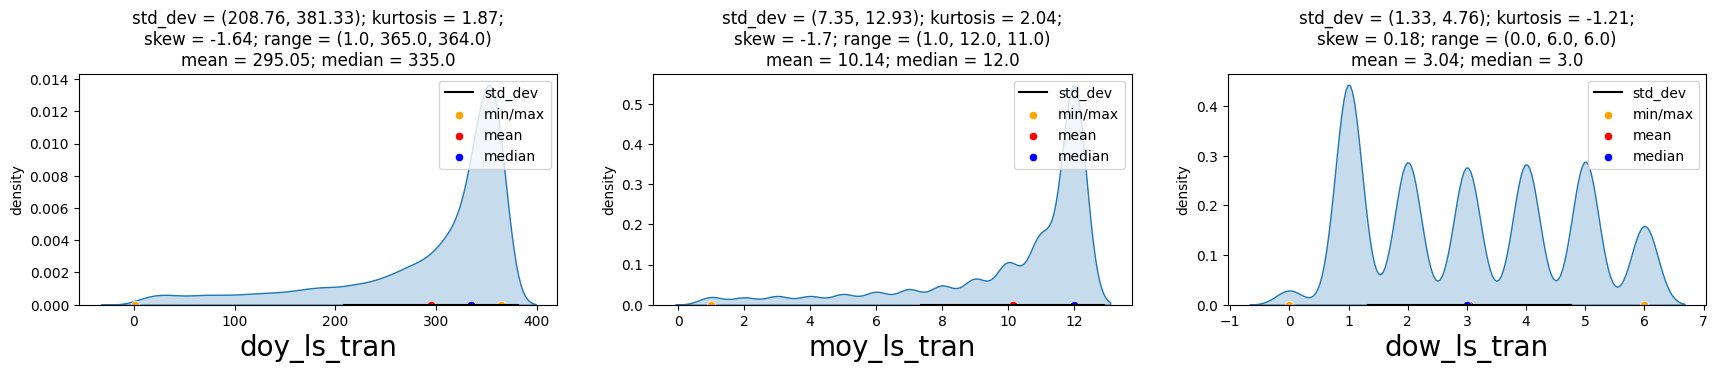

In [24]:
# Performing univariate analysis on transaction_date
univariate_analysis_numerical(data, transaction_date)

## Univariate Analysis: Categorical Variables

In [25]:
# Selecting the variables which belong to object or category
data.select_dtypes(exclude = ['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [26]:
# typecasting 'gender' and 'occupation' to category type
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

data.select_dtypes(exclude = ['int64','float64','Int64']).dtypes

gender                  category
occupation              category
city                    category
customer_nw_category    category
branch_code             category
churn                   category
dtype: object

In [27]:
# custom function for easy and efficient analysis of categorical univariate
def univariate_analysis_categorical(data, var_group):
  '''
  univariate_analysis_categorical takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

    # Plotting the variable with every information
    plt.subplot(1, size, j + 1)
    sns.barplot(x = norm_count, y = norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni, norm_count))

### Customer information

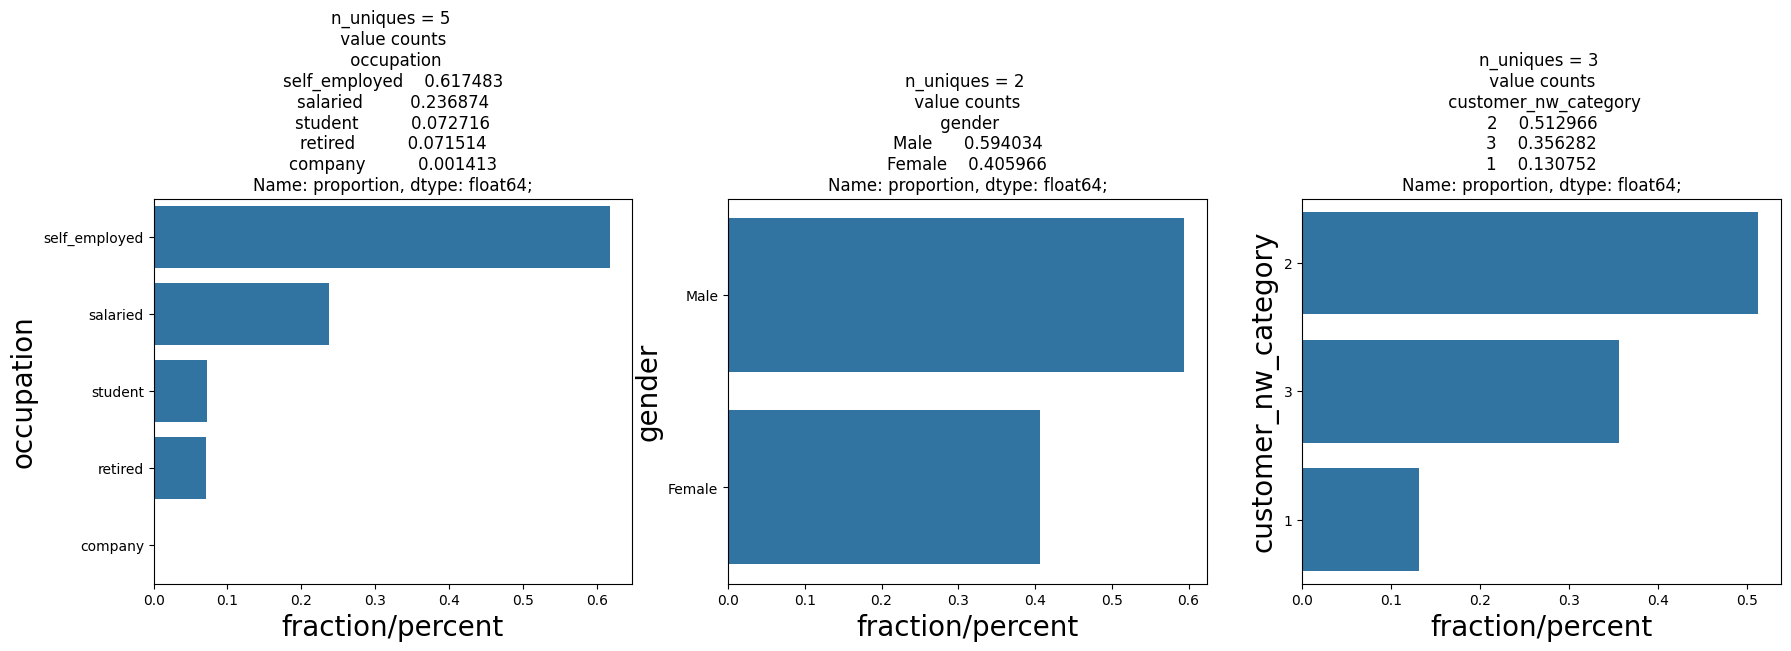

In [28]:
# Performing univariate analysis on customer information
univariate_analysis_categorical(data, ['occupation', 'gender', 'customer_nw_category'])

**Summary:**
- **Occupation:**
    - Majority of people are self_employed.
    - There are extremely few Company Accounts.
<br></br>
- **Gender:** Males accounts are 1.5 times in number than Female Accounts.
<br></br>
- **customer_nw_category:**
    - Half of all the accounts belong to the 3rd net worth category.
    - Less than 15% belong to the highest net worth category.

### Account information

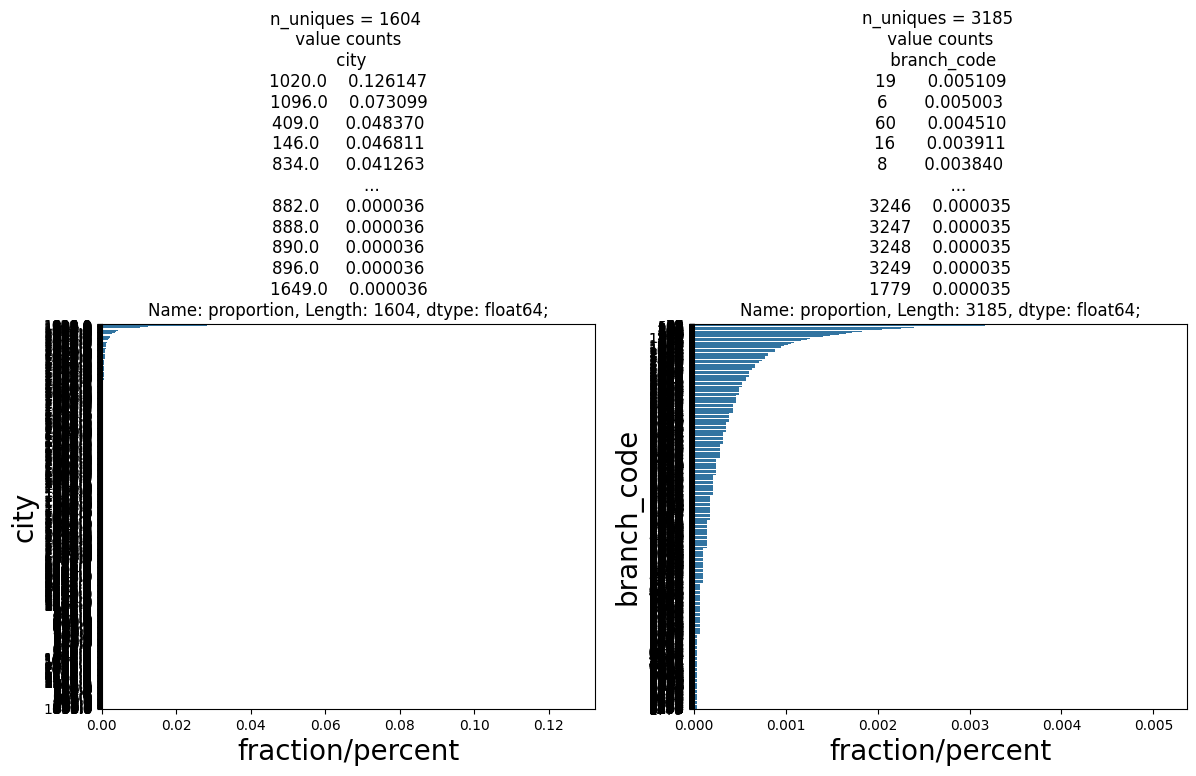

In [29]:
# Performing univariate analysis on account information
univariate_analysis_categorical(data, ['city', 'branch_code'])

**Summary:** for both variable 'city' and 'branch_code', there are too many categories.

### Churn information

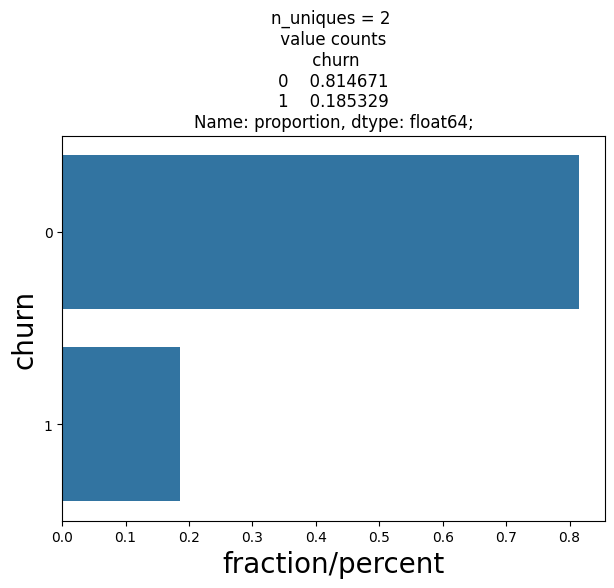

In [30]:
# Performing univariate analysis on churn information
univariate_analysis_categorical(data, ['churn'])

**Summary:** Number of people who churned are 1/4 times of the people who did not churn.

## Univariate Analysis: Missing Values

In [31]:
# finding number of missing values in every variable
data.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                       3223
moy_ls_tran                       3223
dow_ls_tran                       3223
dtype: int64

## Univariate Analysis: Outlier Identification

In [32]:
def univariate_analysis_outliers(data, var_group, include_outlier = True):
  '''
  univariate_analysis_outliers takes a group of variables (INTEGER and FLOAT) and plot/print boplot and descriptives.
  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it.

  data: dataframe from which to plot from
  var_group: {list} type Group of Continuous variables
  include_outlier: {bool} whether to include outliers or not, default = True
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,4), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    quant25 = data[i].quantile(0.25)
    quant75 = data[i].quantile(0.75)
    IQR = quant75 - quant25
    med = data[i].median()
    whis_low = med-(1.5*IQR)
    whis_high = med+(1.5*IQR)

    # Calculating Number of Outliers
    outlier_high = len(data[i][data[i]>whis_high])
    outlier_low = len(data[i][data[i]<whis_low])

    if include_outlier == True:
      print(include_outlier)
      #Plotting the variable with every information
      plt.subplot(1,size,j+1)
      sns.boxplot(data[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('With Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))
      
    else:
      # replacing outliers with max/min whisker
      data2 = data[var_group][:]
      data2[i][data2[i]>whis_high] = whis_high+1
      data2[i][data2[i]<whis_low] = whis_low-1
      
      # plotting without outliers
      plt.subplot(1,size,j+1)
      sns.boxplot(data2[i], orient="v")
      plt.ylabel('{}'.format(i))
      plt.title('Without Outliers\nIQR = {}; Median = {} \n 2nd,3rd  quartile = {};\n Outlier (low/high) = {} \n'.format(
                                                                                                   round(IQR,2),
                                                                                                   round(med,2),
                                                                                                   (round(quant25,2),round(quant75,2)),
                                                                                                   (outlier_low,outlier_high)
                                                                                                   ))

### current_month

True
True
True
True


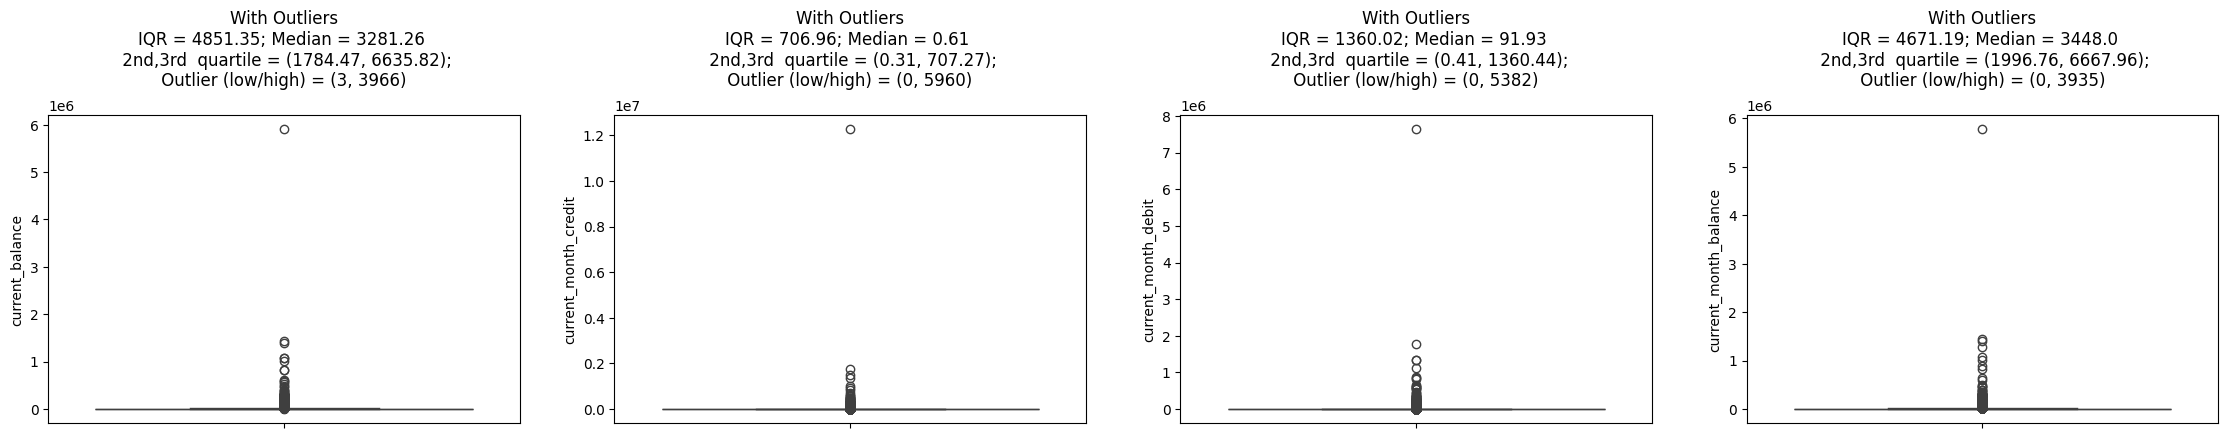

In [33]:
# Performing univariate analysis for outliers on current month
univariate_analysis_outliers(data, current_month)

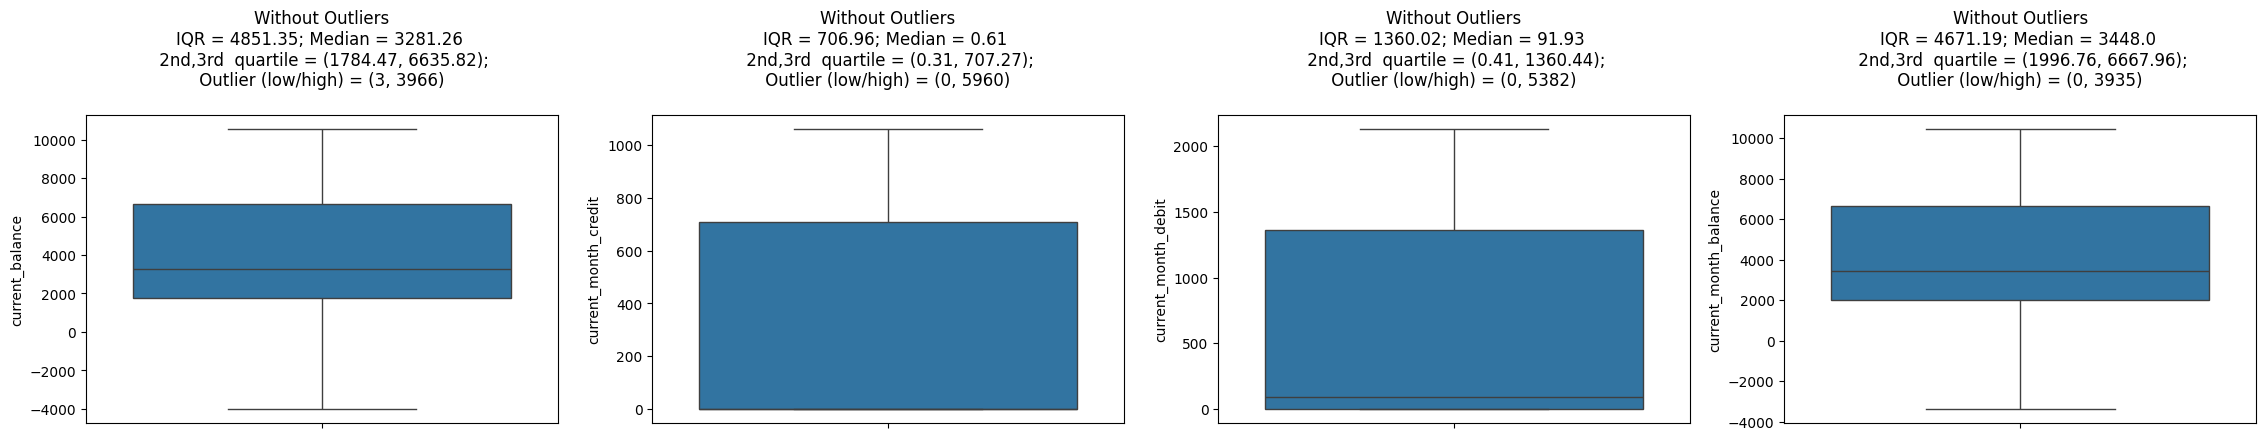

In [34]:
# Performing univariate analysis for outliers on current month without outliers
univariate_analysis_outliers(data, current_month, include_outlier = False)

### previous_month

True
True
True
True


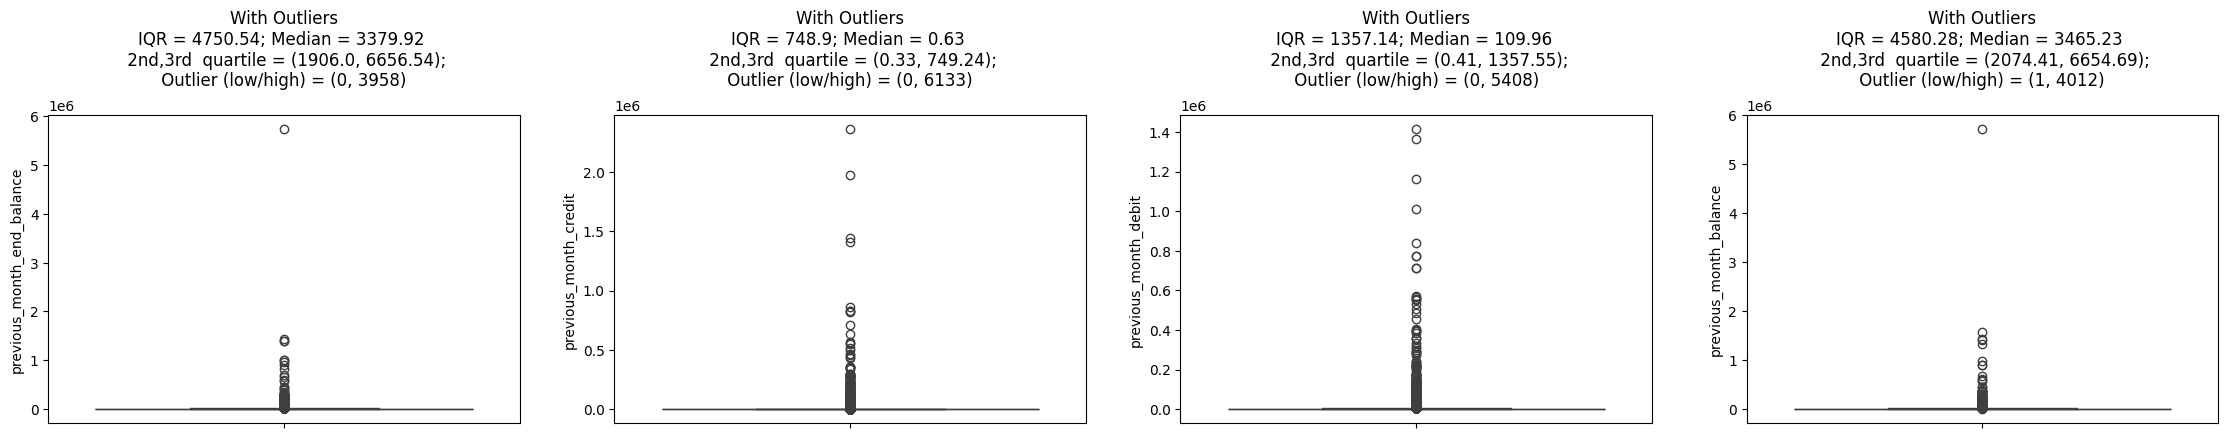

In [35]:
# Performing univariate analysis for outliers on previous month
univariate_analysis_outliers(data, previous_month)

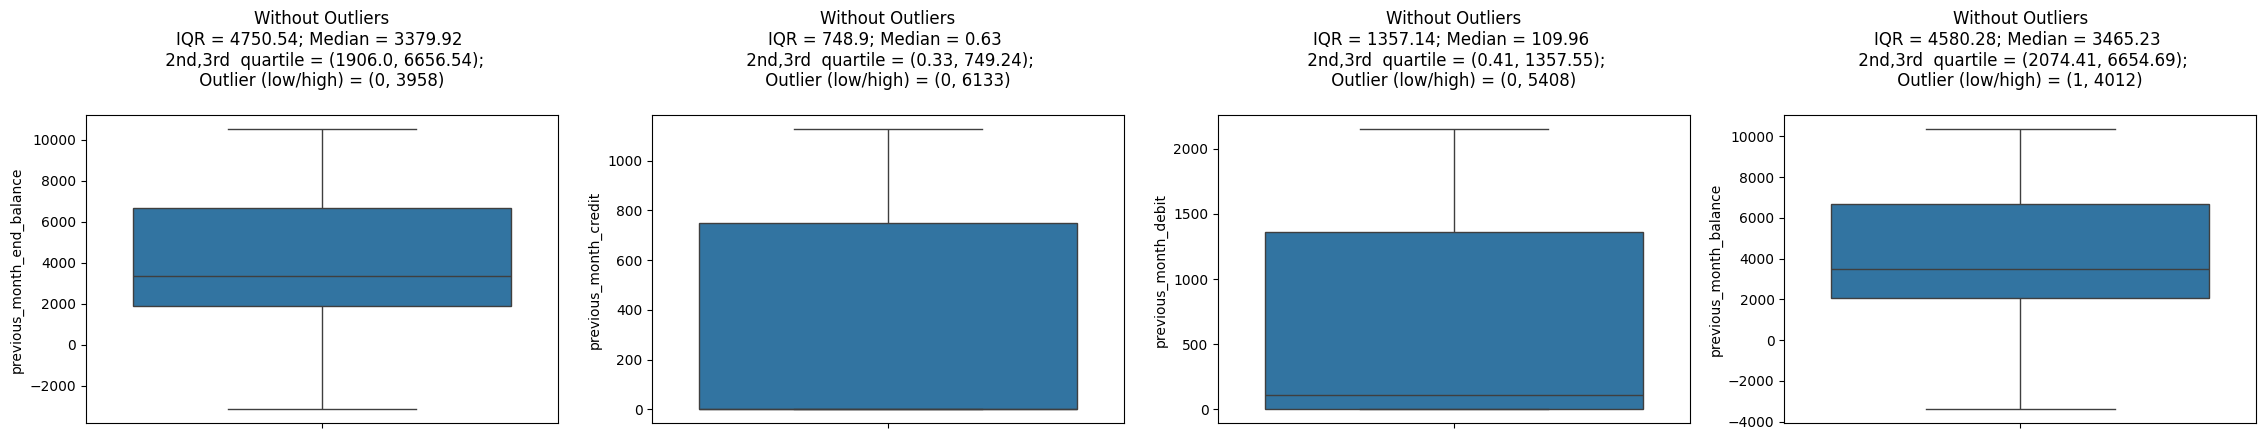

In [36]:
# Performing univariate analysis for outliers on previous month without outliers
univariate_analysis_outliers(data, previous_month, include_outlier = False)

**Summary:**
- There seems to be a strong relation between the corresponding plots of previous_month and current_month variables.
- Outliers are significant in number and very similar in number between corresponding plots. Which indicates some inherent undiscovered behviour of outliers.

### previous_quarters

True
True


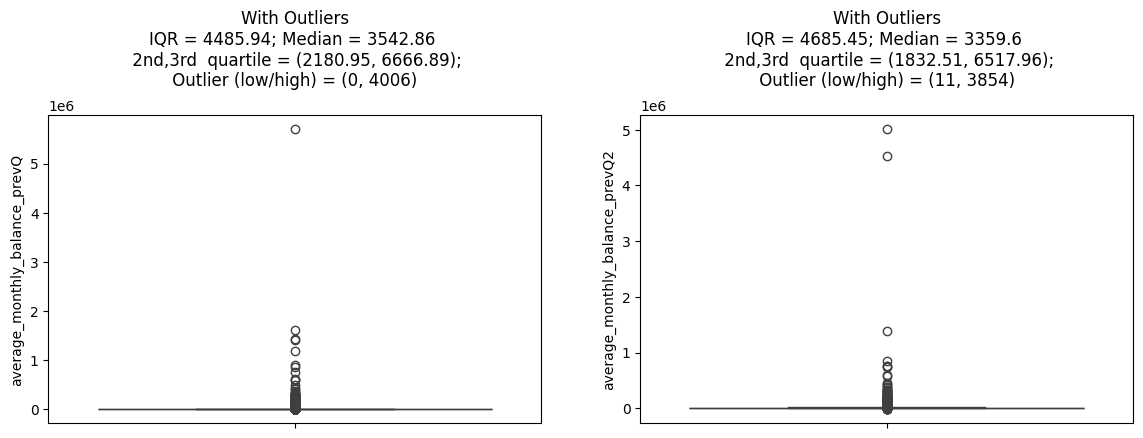

In [37]:
# Performing univariate analysis for outliers on previous quarters
univariate_analysis_outliers(data, previous_quarters)

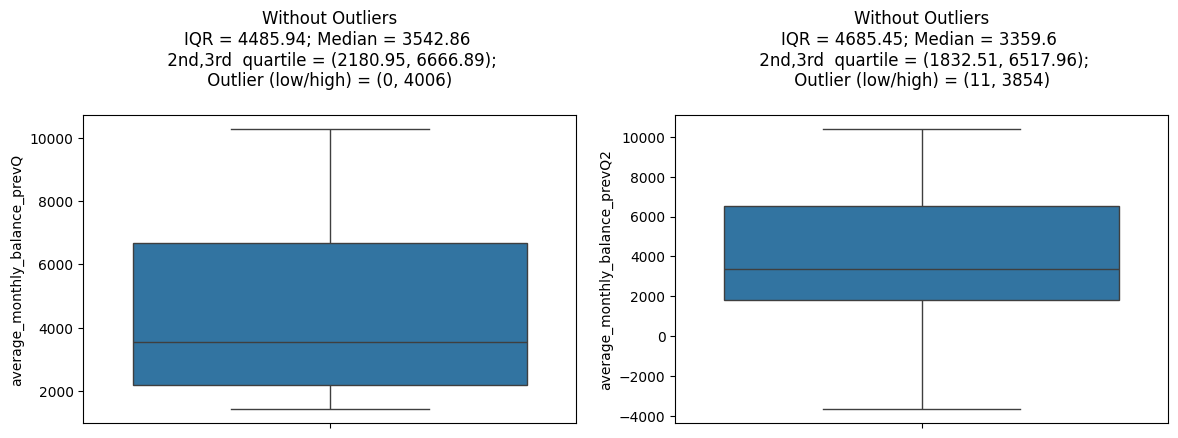

In [38]:
# Performing univariate analysis for outliers on previous quarters without outliers
univariate_analysis_outliers(data, previous_quarters, include_outlier = False)

**Summary:** Outliers in previous two quarters are very similar but significantly large in number.